<a href="https://colab.research.google.com/github/ugywjd/006975/blob/master/ai12_sc41x_%EB%B0%95%ED%9A%A8%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:**
사람의 뉴런이 서로간의 신호를 보내듯, 이를 모방하여 인공적으로 구축했다.
- **Input Layer:**
딥러닝이 필요한 데이터의 입력이 시작디는 곳 계산 없이 값을 전달하기만 한다
- **Hidden Layer:**
입력된 신호를 바탕으로 가중치, 편향 등이 연산되는 층
- **Output Layer:**
연산을 마친 은닉층의 값이 출력되는 곳
- **Activation Function:**
딥러닝 과정에서 계산된 가중합을 얼마 만큼의 신호르 출력할지 결정한다
- **Back Propagation:**
출력층에서 입력층으로 손실정보를 전달해 가중치를 얼마나 업데이트 해야할지 구한다

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

In [1]:
# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요.

신경망의 학습은 데이터가 입력되면 가중치 및 활성화 함수 연산을 반복적으로 수행해 값을 출력하게 됩니다.
이 때 가중치는 각 신호가 연산에 얼마나 기여하는지, 그리고 활성화 함수는 신호의 총합을 출력 신호로 변환하는 함수이다. 
그리고 실제값과 예측값의 차이를 계산하여 가중치를 갱신한다. 이러한 일련의 과정을 순전파라고 칭한다.
순전파와 반대로 정보를 전달하는데, 가중치를 얼마나 업데이트 해야할지 구하기 위해 이러한 과정을 거치게 된다. 
신경망은 매번 손실을 줄이는 방향으로 가중치를 업데이트를 하고 이 과정을 역전파라고 한다.

### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

In [2]:
# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요.

퍼셉트론이란 신경망을 이루는 기본단위이며, 다수의 신호를 입력으로 받아 하나의 신호를 출력하는 구조이다
퍼셉트론의 첫 단계는 가중치-편향 연산이다. 입력된 신호를 각 가중치와 곱하고 그 결과를 더해주는 가중합을 구한다
계산된 가중합은 얼마만큼의 신호로 출력할지 결정해주는 활성화 함수를 사용하게 된다.
활성화 함수는 여러종류가 있어 데이터의 종류에 따라 달리 사용된다.(ex. Sigmoid, ReLU, Softmax)
활성화 함수를 사용한 결과값을 출력값으로 도출하게 된다.

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

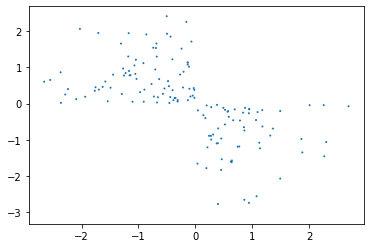

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=100)


Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.0379 - accuracy: 0.4533
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0278 - accuracy: 0.4567
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0169 - accuracy: 0.4567
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0070 - accuracy: 0.4567
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9974 - accuracy: 0.4567
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9877 - accuracy: 0.4567
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9788 - accuracy: 0.4567
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9696 - accuracy: 0.4533
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9606 - accuracy: 0.4567
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9516 - accuracy: 0.4567
Epoch 11/

In [13]:
model1.evaluate(X, y, verbose=2)

10/10 - 0s - loss: 0.6905 - accuracy: 0.5167 - 361ms/epoch - 36ms/step


[0.6905480027198792, 0.5166666507720947]


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [9]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model2 = Sequential() 
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(100, activation='softmax'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

h2 = model2.fit(X, y, epochs=100)

Epoch 1/100


ValueError: ignored

### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [ ]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

In [ ]:
# 이 셀의 코드는 변경하지 마세요

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

In [ ]:
# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요.

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다